### Analysis on `df_w_matrix.csv`
#### Load data and import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('df_w_matrix.csv')
df.shape

(231259, 262)

#### Clean our data first. Delete country names that occurs less than 20 times.
##### (We cannot rely on data occurring less than 20 times)

In [3]:
df.columns[8:]

Index(['aruba', 'afghanistan', 'angola', 'anguilla', 'åland islands',
       'albania', 'andorra', 'united arab emirates', 'argentina', 'armenia',
       ...
       'samoa', 'yemen', 'south africa', 'zambia', 'zimbabwe', 'vietnam', 'US',
       'uk', 'un', 'europe'],
      dtype='object', length=254)

In [4]:
del_ls = [] # A list of country names that needs deleting.
for country in df.columns[8:]:
    if sum(df[country])<=20:
        del_ls.append(country)
print(len(del_ls))
del_ls[:10]

105


['aruba',
 'anguilla',
 'åland islands',
 'andorra',
 'united arab emirates',
 'american samoa',
 'french southern territories',
 'antigua and barbuda',
 'bonaire, sint eustatius and saba',
 'burkina faso']

In [5]:
for country in del_ls:
    del df[country]
df.shape

(231259, 157)

#### Construct dataframe `star` of `'up_votes'` and word frequency

In [6]:
str1 = ['up_votes']
str1.extend(list(df.columns[8:]))
str1[:5]

['up_votes', 'afghanistan', 'angola', 'albania', 'argentina']

In [7]:
star = df[str1]
star.head()

,up_votes,afghanistan,angola,albania,argentina,armenia,antarctica,australia,austria,azerbaijan,...,vanuatu,samoa,yemen,zambia,zimbabwe,vietnam,US,uk,un,europe
0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Analysis
Take a general look at the distribution of the `up_votes` and the mean.

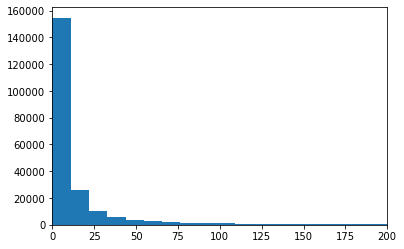

In [8]:
plt.hist(star['up_votes'],1000)
plt.xlim(0,200)
plt.show()

In [9]:
mean_score = np.mean(star['up_votes'])
mean_score

110.49527585953412

The mean of the `'up_votes'` is around 110.
Now, construct two lists `mean_ls` and `freq_ls`, storing mean `'up_votes'` and total occurance for every country in the articles respectively.

In [14]:
mean_ls = []
freq_ls = []

for country in star.columns[1:]:
    mean_ls.append(np.mean(star['up_votes'][star[country]!=0]))
    freq_ls.append(np.sum(star['up_votes'][star[country]!=0]))
    
print(len(mean_ls))
print(len(freq_ls))

149
149


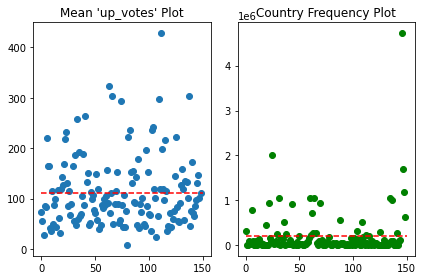

In [24]:
plt.subplot(121)
plt.scatter(x=range(len(mean_ls)), y=mean_ls)
plt.hlines(mean_score,0,150,colors = 'r',linestyles = 'dashed')
plt.title('Mean \'up_votes\' Plot')

plt.subplot(122)
plt.scatter(x=range(len(freq_ls)), y=freq_ls, color = 'g')
plt.hlines(np.mean(freq_ls),0,150,colors = 'r',linestyles = 'dashed')
plt.title('Country Frequency Plot')

plt.tight_layout()
plt.show()

#### Construct a dataframe `new_df` of columns of country names, `mean_ls` and `freq_ls`.

In [31]:
new_df = pd.DataFrame({'country' : star.columns[1:],
                       'mean_votes' : mean_ls,
                       'freq' : freq_ls})
new_df.head()

,country,mean_votes,freq
0,afghanistan,74.207822,326366
1,angola,55.208696,6349
2,albania,27.607143,3092
3,argentina,85.713223,103713
4,armenia,82.510638,23268


array([  7.35135135,  24.13286713,  27.60714286,  32.13114754,
        35.40677966,  35.97552448,  36.41501976,  38.86046512,
        40.70501059,  41.8452381 ,  42.38636364,  43.11395541,
        43.8121533 ,  43.82544379,  43.82940802,  44.55555556,
        45.30612245,  45.5741342 ,  46.77957861,  47.5       ,
        47.65333333,  47.9266055 ,  49.19230769,  49.45121951,
        50.25490196,  50.46590909,  51.38396624,  54.33333333,
        54.88640275,  55.20869565,  55.68396226,  56.86619718,
        57.89784946,  57.94264339,  58.73222749,  58.7955665 ,
        60.75595238,  64.3428934 ,  64.84539097,  66.15533981,
        67.19270833,  67.66280992,  69.35955056,  70.21558442,
        71.13858696,  71.45967191,  71.90138963,  72.03050079,
        72.60629921,  74.20782174,  75.27884615,  75.43119266,
        75.62068966,  76.63247863,  81.8172378 ,  82.5       ,
        82.5106383 ,  85.19090098,  85.59902867,  85.71322314,
        85.96725014,  86.54316547,  86.90993072,  86.95